**Iris Flower Classification**
* The Iris dataset is a well-known dataset in the machine learning community. It contains features of three different species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Your task is to build a simple classification model that can predict the species of an Iris flower based on its petal and sepal measurements. Use algorithms like logistic regression or K-nearest neighbors (KNN) for this task.
[[data]](https://www.kaggle.com/code/anshigupta01/iris-flower-classification)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
data=pd.read_csv("d:/csv/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data=data.drop(columns=['Id'])

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

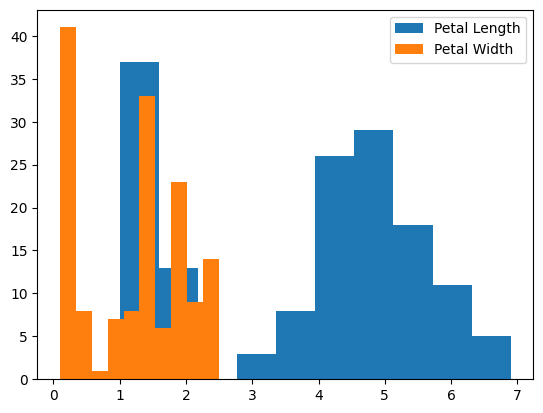

In [9]:
plt.hist(data['PetalLengthCm'],label='Petal Length')
plt.hist(data['PetalWidthCm'],label='Petal Width')
plt.legend()
plt.show()

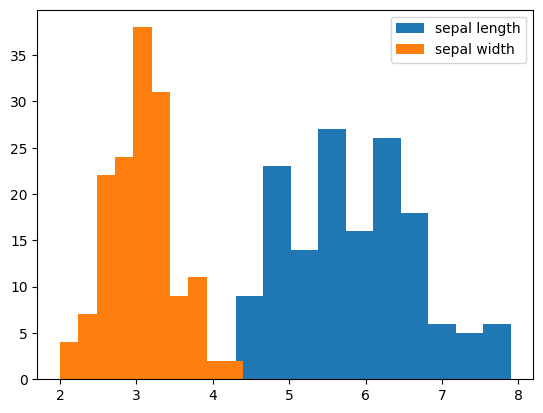

In [10]:
plt.hist(data['SepalLengthCm'],label='sepal length')
plt.hist(data['SepalWidthCm'],label='sepal width')
plt.legend()
plt.show()

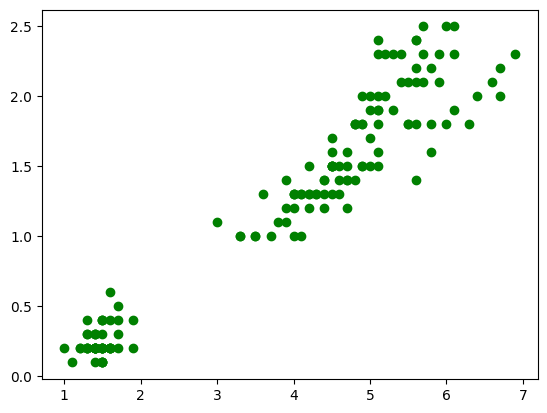

In [11]:
plt.scatter(x=data['PetalLengthCm'],y=data['PetalWidthCm'],c='g')
plt.show()

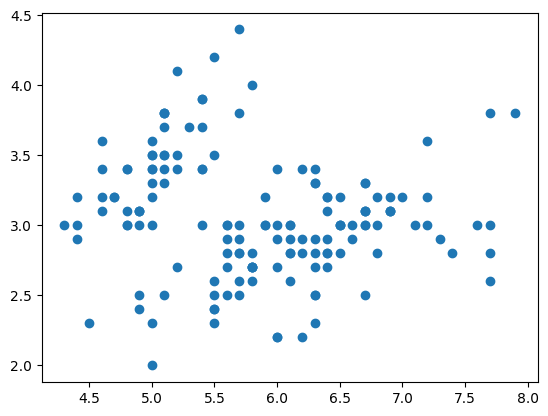

In [12]:
plt.scatter(x=data['SepalLengthCm'],y=data['SepalWidthCm'])
plt.show()

In [13]:
# data.corr()

In [14]:
encode=LabelEncoder()
data['Species']=encode.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X=data.drop(['Species'],axis='columns')
y=data['Species']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
model.score(x_test,y_test)*100

93.33333333333333

**KNN**

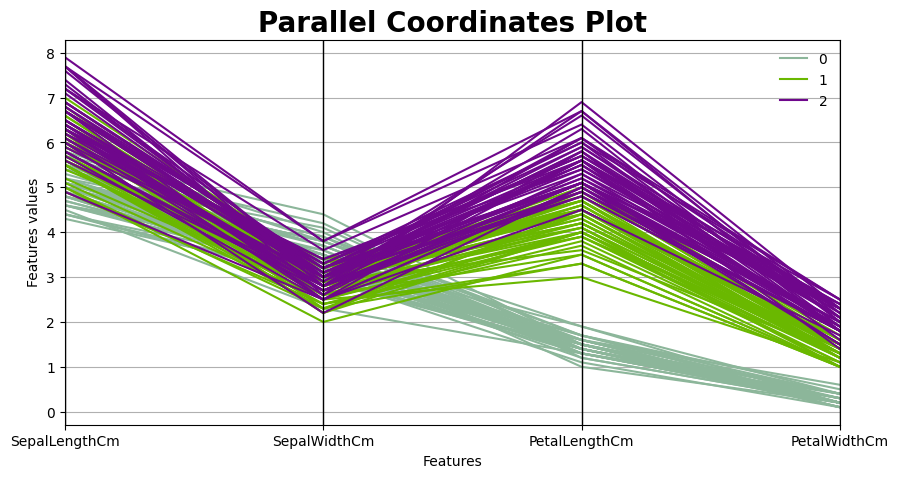

In [20]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
parallel_coordinates(data,"Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features values')
plt.legend(loc=1, frameon=False,shadow=False, edgecolor="blue")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 1])

In [26]:
classifier.score(x_train,y_train)*100

98.33333333333333